<a href="https://colab.research.google.com/github/Eitams/NLP_Exercise/blob/main/NLP_exercise2_Eitam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Language Technologies - Exercise 2
#  Word embeddings

Author: Eitam Shafran

In [1]:
## Attached git reseparatory to download extracted data from
!git clone https://github.com/Eitams/NLP_Exercise.git 

Cloning into 'NLP_Exercise'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 82 (delta 35), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [2]:
## Import laibraries
## data processing
import pandas as pd
import numpy as np

## For plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

## Text processing
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## for Named-entity recognition (NER)
import spacy


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
## Loading data from git
df_bacteria = pd.read_csv("NLP_Exercise/data/bacteria_df.csv", index_col=0)
df_phage = pd.read_csv("NLP_Exercise/data/bacteriophage_df.csv", index_col=0)

In [4]:
# Dropping first row of df_phage (Its the general discription and not phage type)
df_phage.drop(index = 0, inplace = True)
df_phage.head()

,Name,Description
1,Bacillus virus AP50,Bacillus virus AP50 is a species of bacterioph...
2,Bacteriophage AP205,Bacteriophage AP205 is a bacteriophage that in...
3,Bacteriophage f2,"Bacteriophage f2 is an icosahedral, positive-s..."
4,Bacteriophage MS2,"Bacteriophage MS2 (Emesvirus zinderi), commonl..."
5,Bacteriophage Mu,"Bacteriophage Mu, also known as mu phage or mu..."


In [5]:
'''
Merge data into 1 data frame
'''
## Add type column
df_bacteria["Type"] = "Bacteria" 
df_phage["Type"] = "Bacteriophage" 

## Merge df
df = pd.concat([df_bacteria, df_phage])

In [6]:
print("Dataframe dimensions: {}".format(df.shape))
df.head()

Dataframe dimensions: (179, 3)


,Name,Description,Type
0,Acinetobacter baumannii,"Acinetobacter baumannii is a typically short, ...",Bacteria
1,Actinomyces israelii,Actinomyces israelii is a species of Gram-posi...,Bacteria
2,Agrobacterium tumefaciens,Agrobacterium radiobacter (more commonly known...,Bacteria
3,Anaplasma,Anaplasma is a genus of bacteria of the alphap...,Bacteria
4,Anaplasma phagocytophilum,Anaplasma phagocytophilum (formerly Ehrlichia ...,Bacteria


## Data preprocessing

In [7]:
'''
Function which remove html tags from text string.
'''
def utils_basic_clean(text):
    ## clean ( Remove HTML tags)
    text = str(text).replace("(<br/>)", "") ## line break element
    text = text.replace('(<a).*(>).*(</a>)', '') ## Hyperlink tag
    text = text.replace('(&amp)', '')
    text = text.replace('(&gt)', '')
    text = text.replace('(&lt)', '')
    text = text.replace('(\xa0)', ' ') 
    
    return(text)



'''
Function which preprocess a text string:
Lower case, remove punctuation and stopwords, lemmatization or stemming)
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then remove leading and trailing whitespaces)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [8]:
## Creating a list of stopwords (usnig NLTK packege) to remove from text
lst_stopwords = nltk.corpus.stopwords.words("english")
print(lst_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
## Apply basic cleaning on Description column
df["Description"] = df["Description"].apply(lambda x: utils_basic_clean(x))

## Apply cleaning and preprocessing on Description column using utils function with lemmatization of words -saving as a new column-
df["Description_clean"] = df["Description"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df.head()


,Name,Description,Type,Description_clean
0,Acinetobacter baumannii,"Acinetobacter baumannii is a typically short, ...",Bacteria,acinetobacter baumannii typically short almost...
1,Actinomyces israelii,Actinomyces israelii is a species of Gram-posi...,Bacteria,actinomyces israelii specie grampositive rodsh...
2,Agrobacterium tumefaciens,Agrobacterium radiobacter (more commonly known...,Bacteria,agrobacterium radiobacter commonly known agrob...
3,Anaplasma,Anaplasma is a genus of bacteria of the alphap...,Bacteria,anaplasma genus bacteria alphaproteobacterial ...
4,Anaplasma phagocytophilum,Anaplasma phagocytophilum (formerly Ehrlichia ...,Bacteria,anaplasma phagocytophilum formerly ehrlichia p...


In [10]:
## Create a tokanized column
from spacy.lang.en import English

# Disable all the annotators except the tokenizer so its fast
nlp = English(disable=['tagger', 'parser', 'ner'])

def tokenize(text):
  return [t.text.lower() for t in nlp(text)]  

In [11]:
# Apply tokenization (on clean data)
df['tokens'] = df['Description_clean'].apply(tokenize)


In [12]:
df.head()

,Name,Description,Type,Description_clean,tokens
0,Acinetobacter baumannii,"Acinetobacter baumannii is a typically short, ...",Bacteria,acinetobacter baumannii typically short almost...,"[acinetobacter, baumannii, typically, short, a..."
1,Actinomyces israelii,Actinomyces israelii is a species of Gram-posi...,Bacteria,actinomyces israelii specie grampositive rodsh...,"[actinomyces, israelii, specie, grampositive, ..."
2,Agrobacterium tumefaciens,Agrobacterium radiobacter (more commonly known...,Bacteria,agrobacterium radiobacter commonly known agrob...,"[agrobacterium, radiobacter, commonly, known, ..."
3,Anaplasma,Anaplasma is a genus of bacteria of the alphap...,Bacteria,anaplasma genus bacteria alphaproteobacterial ...,"[anaplasma, genus, bacteria, alphaproteobacter..."
4,Anaplasma phagocytophilum,Anaplasma phagocytophilum (formerly Ehrlichia ...,Bacteria,anaplasma phagocytophilum formerly ehrlichia p...,"[anaplasma, phagocytophilum, formerly, ehrlich..."


## Visualize semantic space
**Using Word2Vec word embedding with window = 5**


In [13]:
# Train embedding space using the word2vec architecture
from gensim.models import Word2Vec

# Set values for various parameters
feature_size = 100  # Word vector dimensionality
window_context = 5  # Context window size
min_word_count = 5  # Minimum word count

## Train the model on the bacteria class
sentences = df.loc[df.Type == "Bacteria", "tokens"]
w2vmodel_bacteria = Word2Vec(sentences=sentences, size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

## Train the model on the bacteriophage class
sentences = df.loc[df.Type == "Bacteriophage", "tokens"]
w2vmodel_phage = Word2Vec(sentences=sentences, size=feature_size, window=window_context, min_count=min_word_count, sg = 0)


### Plot bacteria semantic space

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


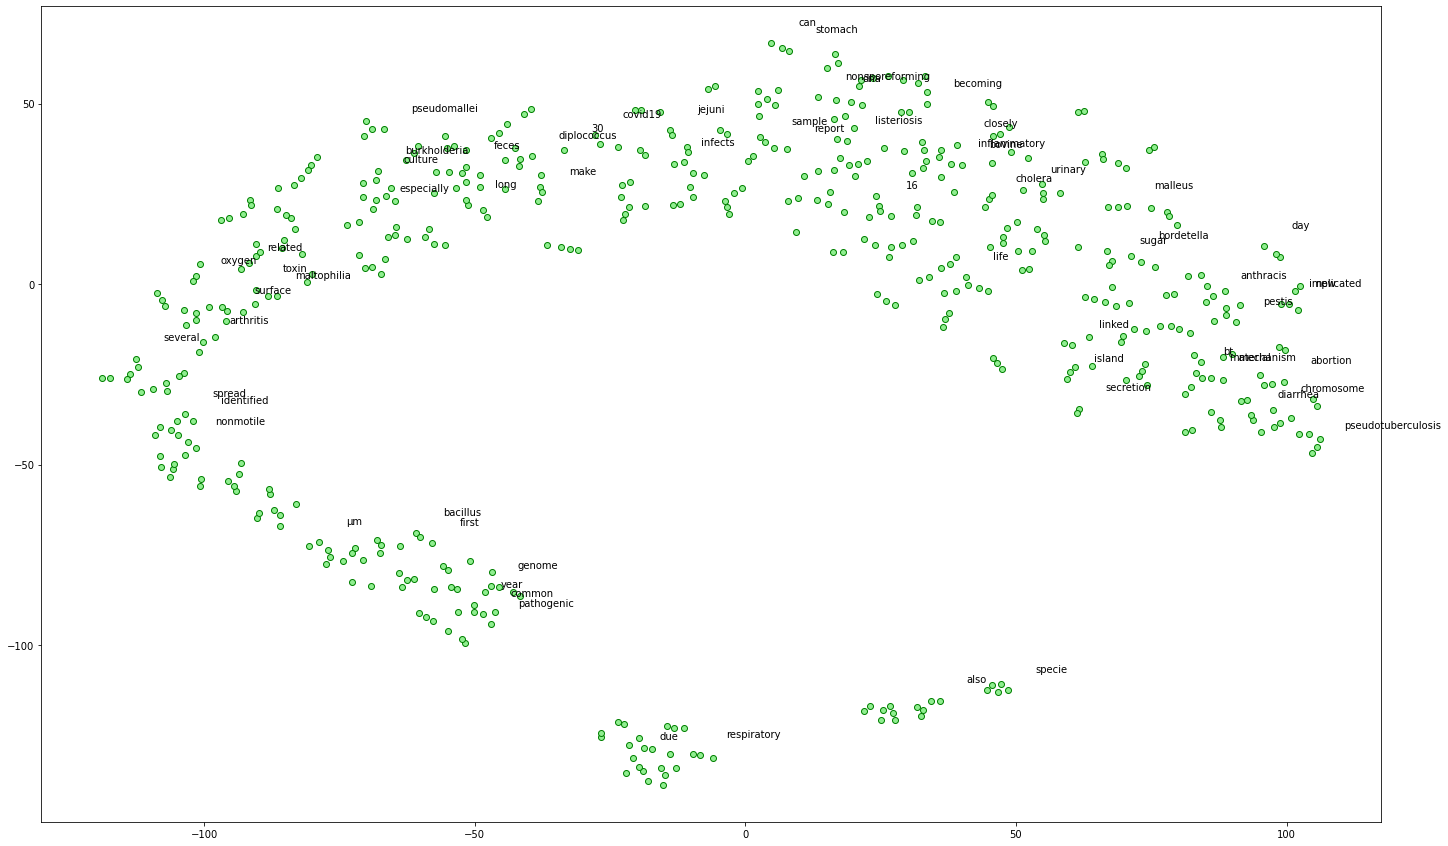

In [18]:
from sklearn.manifold import TSNE

words = w2vmodel_bacteria.wv.index2word[0:]      ## get the word forms of voculary sample
wvs = w2vmodel_bacteria.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(24, 15))
plt.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')

for label, x, y in list(zip(labels, T[:, 0], T[:, 1]))[::8]: ## 8 represent the steps for the labels to appear 
    plt.annotate(label,
                 xy=(x + 5, y + 5),
                 xytext=(0, 0),
                 textcoords='offset points')
plt.show()

### Plot bacteriophage semantic space

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


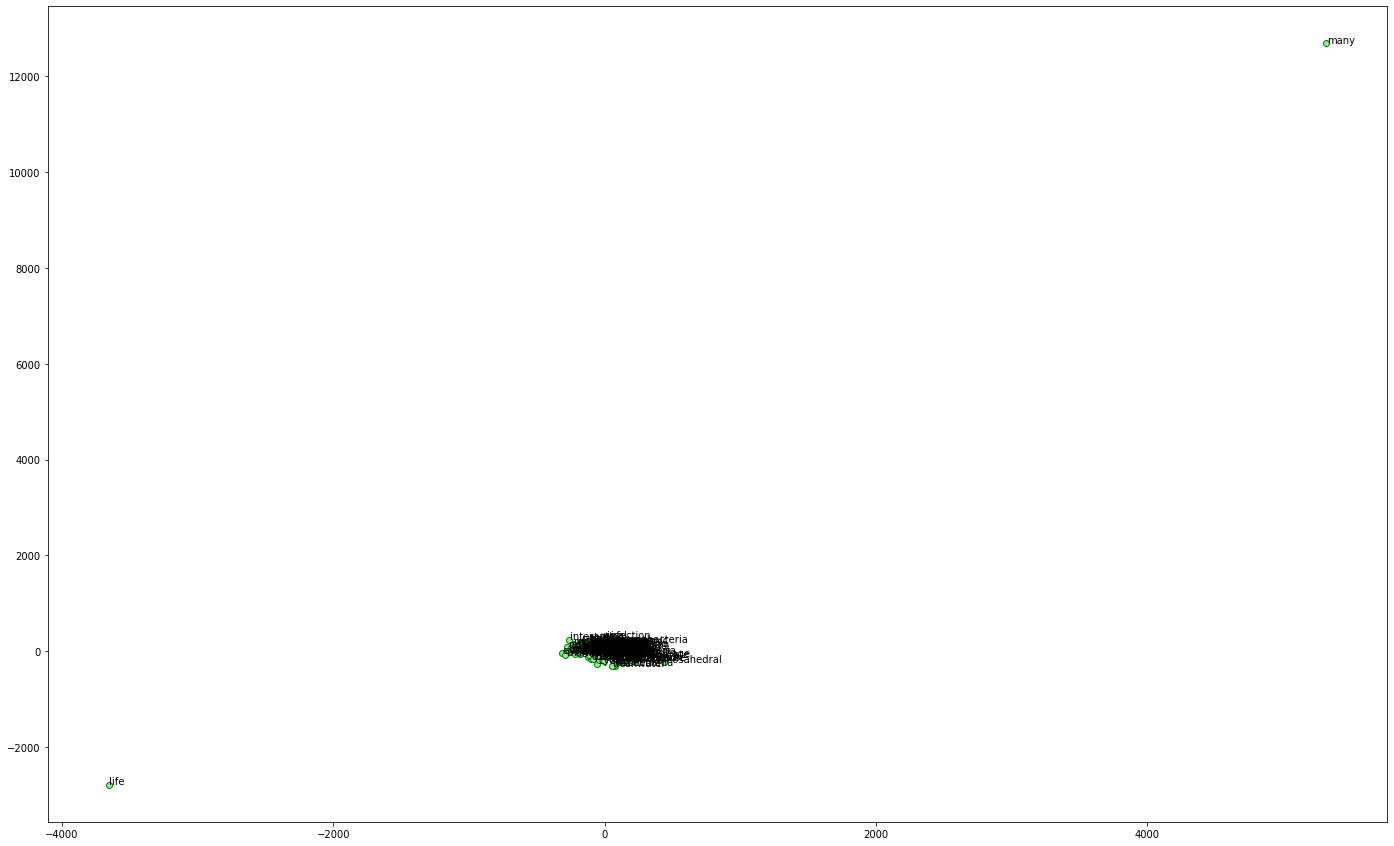

In [20]:
from sklearn.manifold import TSNE

words = w2vmodel_phage.wv.index2word[0:]      ## get the word forms of voculary sample
wvs = w2vmodel_phage.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(24, 15))
plt.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')

for label, x, y in list(zip(labels, T[:, 0], T[:, 1]))[::]:
    plt.annotate(label,
                 xy=(x + 5, y + 5),
                 xytext=(0, 0),
                 textcoords='offset points')
plt.show()

####  Replot bacteriophage semantic space without outliars

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


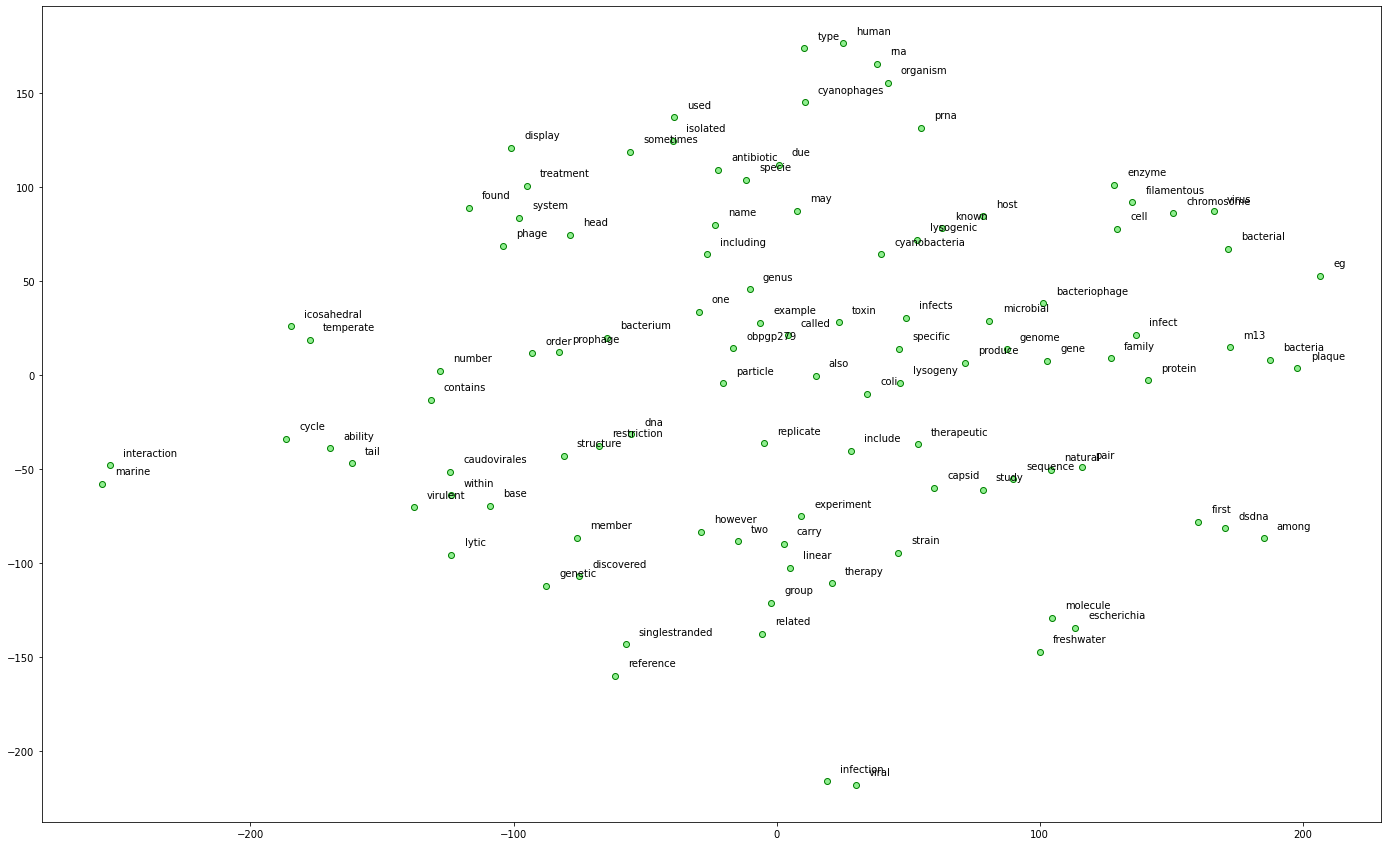

In [21]:
words = w2vmodel_phage.wv.index2word[0:]      ## get the word forms of voculary sample
words = [word for word in words if word not in ["life", "many"]] ## remove outliars

wvs = w2vmodel_phage.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(24, 15))
plt.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')

for label, x, y in list(zip(labels, T[:, 0], T[:, 1]))[::]:
    plt.annotate(label,
                 xy=(x + 5, y + 5),
                 xytext=(0, 0),
                 textcoords='offset points')
plt.show()

Insights (words2Vec - window = 5):  
No distinct groups are visible within the bacteriophage semantic space.  
On the other hand, several clusters are visible at the Bacteria group semantic space.


## Compare embedding models
Comparing embedding of top 5 frequent words between different models

### Find top 5 frequent words from each group - Bacteria and Bacteriophage


In [145]:
'''
Function which return the frequancy of the selected gram number for the text
'''
def get_top_n_words(corpus, n=None, x=1, y=1):
    vec = CountVectorizer(ngram_range=(x, y)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

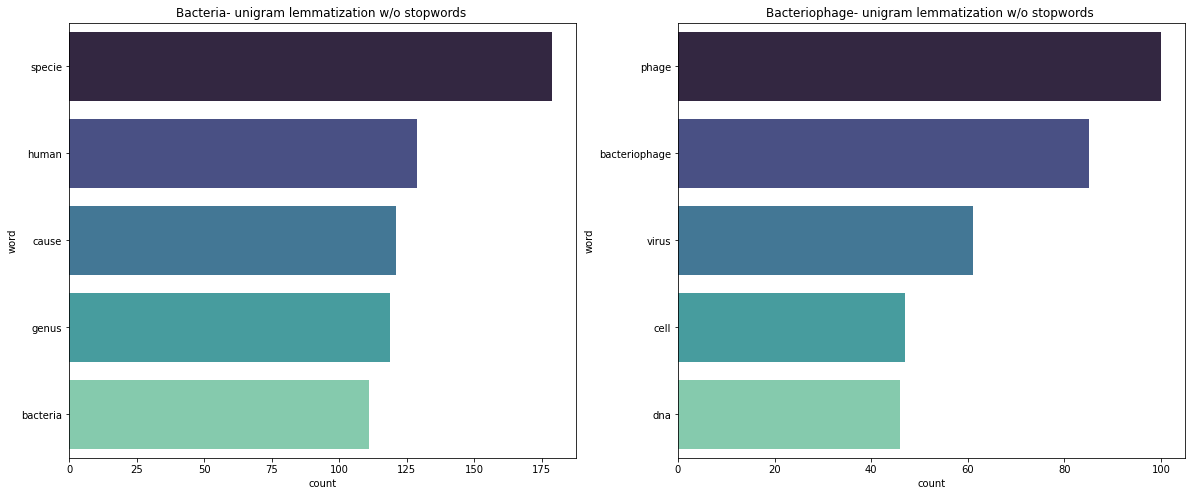

In [146]:
## For the word count we will use the clean text (No stopwords and with lemmitisation of the words)
## Get all description texts
all_desc_bacteria = df.loc[df["Type"]=="Bacteria","Description_clean"]
all_desc_phage = df.loc[df["Type"]=="Bacteriophage","Description_clean"]

'''
Plotting top 5 Unigram of bacteria vs bacteriophage
'''
## Calculating unigram
common_words_bacteria = get_top_n_words(all_desc_bacteria, 5)
common_words_phage = get_top_n_words(all_desc_phage, 5)
unigrams_bacteria = pd.DataFrame(common_words_bacteria, columns = ['word' , 'count'])
unigrams_bacteriophage = pd.DataFrame(common_words_phage, columns = ['word' , 'count'])

## Plotting
fix, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.barplot(x="count", y="word",orient="h",ax = ax1, palette="mako", data=unigrams_bacteria)
ax1.set_title("Bacteria- unigram lemmatization w/o stopwords ")
sns.barplot(x="count", y="word",orient="h", ax =ax2, palette="mako", data=unigrams_bacteriophage)
ax2.set_title("Bacteriophage- unigram lemmatization w/o stopwords ")
plt.tight_layout
plt.show()

### Bacteria


In [147]:
## Assigning top 5 bacteria words to a list
top5_bacteria = []

for i in common_words_bacteria[0:5]:
  top5_bacteria.append(i[0])

print("Top 5 frequent bacteria words: {}".format(top5_bacteria))

Top 5 frequent bacteria words: ['specie', 'human', 'cause', 'genus', 'bacteria']


**Model 1 - Words2Vec window = 5**

In [148]:
# View similar words based on gensim's model
model1_bacteria = {
    search_term:
    [item[0] for item in w2vmodel_bacteria.wv.most_similar([search_term], topn=5)]
    for search_term in top5_bacteria 
}
model1 = pd.DataFrame(model1_bacteria).T

**Model 2 - Words2Vec window = 15**

In [149]:
# Set values for various parameters
feature_size = 100  # Word vector dimensionality
window_context = 15  # Context window size
min_word_count = 5  # Minimum word count

## Train the model on the bacteria class
sentences = df.loc[df.Type == "Bacteria", "tokens"]
w2vmodel_bacteria_15 = Word2Vec(sentences=sentences, size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

## Train the model on the bacteriophage class
sentences = df.loc[df.Type == "Bacteriophage", "tokens"]
w2vmodel_phage_15 = Word2Vec(sentences=sentences, size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

In [150]:
# View similar words based on gensim's model
model2_bacteria = {
    search_term:
    [item[0] for item in w2vmodel_bacteria_15.wv.most_similar([search_term], topn=5)]
    for search_term in top5_bacteria 
}
model2 = pd.DataFrame(model2_bacteria).T

**Model 3 - gloveglove-wiki-gigaword-100**


In [151]:
import gensim.downloader as api

# Download the pretrained Glove embeddings. Try fasttext at home.
glove_vectors = api.load("glove-wiki-gigaword-100")                            ## Glove vectors

In [152]:
# View similar words based on glove's model
model3_bacteria = {
    search_term:
    [item[0] for item in glove_vectors.most_similar([search_term], topn=5)]
    for search_term in top5_bacteria 
}
model3= pd.DataFrame(model3_bacteria).T

In [153]:
print("Model1 - word2vec window=5: \n {} \n".format(model1))
print("Model2 - word2vec window=15: \n {} \n".format(model2))
print("Model3 - glove: \n {} \n".format(model3))

Model1 - word2vec window=5: 
                0          1          2          3        4
specie     human   bacteria      cause       form    genus
human     specie      cause  infection   bacteria     also
cause     specie   bacteria      human  bacterium     also
genus     specie   bacteria       cell  infection  disease
bacteria  specie  infection      cause      genus    human 

Model2 - word2vec window=15: 
                  0          1          2      3          4
specie    bacteria      human    disease  cause      genus
human       specie       also  infection  cause   bacteria
cause       specie   bacteria      human   also  bacterium
genus       specie   bacteria    disease   cell  infection
bacteria    specie  infection      cause  genus  bacterium 

Model3 - glove: 
                   0              1               2          3          4
specie         waka  disbursements       riksdaler    offtake        s-1
human        animal         rights          humans    animals  

Key insights Bacteria:
- Only a small difference is visible between model 1 and model 2 results although we changed the window size.
One possible option for those results is our use of the clean tokenized column as our input. By using this column which has no stop words and only lemmatized words as an input we probably removed most of the structure of the sentence effects on the model (which other wise should be visible in model1 with the smaller window size). 

- While the results for models 1 and 2 are specific for our domain, the results of model 3 relate to the relationship of the words from other domain as well (the model was trained with a more diverse data).
- Most of the results in model 3 are different then those of model 1 and 2
- By looking at the results of model 3 we can see that  the model was trained with the non lemmatized form of the tokens.
 



### Bacteriophage


In [154]:
top5_phage = []
for i in common_words_phage[0:5]:
  top5_phage.append(i[0])
print("Top 5 bacteriophage: {}".format(top5_phage)) 

Top 5 bacteriophage: ['phage', 'bacteriophage', 'virus', 'cell', 'dna']


**Model 1 - Words2Vec window = 5**

In [155]:
# View similar words based on gensim's model
model1_phage = {
    search_term:
    [item[0] for item in w2vmodel_phage.wv.most_similar([search_term], topn=5)]
    for search_term in top5_phage 
}
model1 = pd.DataFrame(model1_phage).T

**Model 2 - Words2Vec window = 15**

In [156]:
# View similar words based on gensim's model
model2_phage = {
    search_term:
    [item[0] for item in w2vmodel_phage_15.wv.most_similar([search_term], topn=5)]
    for search_term in top5_phage
}
model2 = pd.DataFrame(model2_phage).T

**Model 3 - gloveglove-wiki-gigaword-100**


In [157]:
# View similar words based on glove's model
model3_phage = {
    search_term:
    [item[0] for item in glove_vectors.most_similar([search_term], topn=5)]
    for search_term in top5_phage
}
model3= pd.DataFrame(model3_phage).T

In [158]:
print("Model1 - word2vec window=5: \n {} \n".format(model1))
print("Model2 - word2vec window=15: \n {} \n".format(model2))
print("Model3 - glove: \n {} \n".format(model3))

Model1 - word2vec window=5: 
                         0            1              2           3         4
phage              system    bacterial         family   treatment    infect
bacteriophage      genome         cell         called        also  bacteria
virus           bacterial   chromosome           cell       known      host
cell                virus  filamentous  bacteriophage  chromosome    within
dna            chromosome  restriction      bacterial        name    strain 

Model2 - word2vec window=15: 
                            0       1              2              3          4
phage          bacteriophage  system         genome      bacterial      virus
bacteriophage          phage    cell         genome       bacteria      cycle
virus                  phage    cell      bacterial  bacteriophage       host
cell           bacteriophage   phage          virus            dna  bacterial
dna              restriction   phage  bacteriophage      bacterial       cell 

Model3 - gl

Key insights Bacteriophage:
- Bigger differances between model1 and model2 can be seen within the Bacteriophage group (in relation to the Bacteria group). This is potentially due to the smaller sample size.

- In general, I would have expected that the results of the words phage and bacteriophage in model 3 would be similar to the results in model 1 and 2, this is due to thier specificity. Nevertheless, it seems as if this is not the case, and the only common words are just the lemmatized form of the words themself.  
One assumption is that while our data cover the full reange of Bacteriphages evenly, with no biases (one summary for each type of bacteriophage), the data that the glove model is trained on is on one hand wider but on the other hand unbalanced. In this case "Popular" bacteriophages and thier use cases would probably have bigger presence in the data. (e.g., use of phages in the field of HIV-1)




## WordNet

In [143]:
## Looking for similar type of speach for the most frequent words
## Bacteria
from nltk.corpus import wordnet as wn
n = 0
for i in top5_bacteria:
  tmp = wn.synsets(i)[0].similar_tos()
  if len(tmp) > 0:
     n+=1
     print(tmp)
 
if n == 0:
  print("No similar type of speech for any of the words") 

No similar type of speech for any of the words


In [144]:
## Phage
n = 0
for i in top5_phage:
  tmp = wn.synsets(i)[0].similar_tos()
  if len(tmp) > 0:
     n+=1
     print(tmp)
 
if n == 0:
  print("No similar type of speech for any of the words") 

No similar type of speech for any of the words


No similar type of speech for any of the top 5 frequent words in both categories were found.   
Not like the word embedding models who aim to find similarities based on context of the word, the main relation among words in WordNet is synonymy, hance, the comparison between the results using wordnet to the embedded models we worked with in this notebook would not be relevant.